In [1]:
import pandas as pd

df = pd.read_csv('nifty.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/06/22,16283.95020,16324.70020,16172.59961,16201.79981,16201.79981,189700
1,13/06/22,15877.54981,15886.15039,15684.00000,15774.40039,15774.40039,225500
2,14/06/22,15674.25000,15858.00000,15659.45020,15732.09961,15732.09961,225400
3,15/06/22,15729.25000,15783.65039,15678.90039,15692.15039,15692.15039,183000
4,16/06/22,15832.25000,15863.15039,15335.09961,15360.59961,15360.59961,264700
...,...,...,...,...,...,...,...
243,05/06/23,18612.00000,18640.15039,18582.80078,18593.84961,18593.84961,256100
244,06/06/23,18600.80078,18622.75000,18531.59961,18599.00000,18599.00000,220800
245,07/06/23,18665.59961,18738.94922,18636.00000,18726.40039,18726.40039,260100
246,08/06/23,18725.34961,18777.90039,18615.59961,18634.55078,18634.55078,286500


In [2]:
import pandas as pd

df = pd.read_csv('nifty.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame to select only the dates that fall on Thursdays or Wednesdays (handling Thursday holidays)
thursdays_df = df[(df['Date'].dt.dayofweek == 3) | ((df['Date'].dt.dayofweek == 2) & ~(df['Date'].dt.dayofweek.shift(-1) == 3))]

# Print the filtered DataFrame
print(thursdays_df)


          Date         Open         High          Low        Close  \
0   2022-10-06  16283.95020  16324.70020  16172.59961  16201.79981   
4   2022-06-16  15832.25000  15863.15039  15335.09961  15360.59961   
9   2022-06-23  15451.54981  15628.45020  15367.50000  15556.65039   
14  2022-06-30  15774.50000  15890.00000  15728.84961  15780.25000   
16  2022-04-07  15710.50000  15852.34961  15661.79981  15835.34961   
19  2022-07-07  16113.75000  16150.50000  16045.95020  16132.90039   
22  2022-12-07  16126.20020  16158.75000  16031.15039  16058.29981   
24  2022-07-14  16018.84961  16070.84961  15858.20020  15938.65039   
29  2022-07-21  16523.55078  16626.94922  16483.90039  16605.25000   
34  2022-07-28  16774.84961  16947.65039  16746.25000  16929.59961   
44  2022-12-08  17659.65039  17724.65039  17597.84961  17698.15039   
47  2022-08-18  17898.65039  17968.44922  17852.05078  17956.50000   
52  2022-08-25  17679.00000  17726.50000  17487.44922  17522.44922   
57  2022-02-09  1759

In [3]:
df_new = df[['Date', 'Open','Close','Volume']]
df_new

,Date,Open,Close,Volume
0,2022-10-06,16283.95020,16201.79981,189700
1,2022-06-13,15877.54981,15774.40039,225500
2,2022-06-14,15674.25000,15732.09961,225400
3,2022-06-15,15729.25000,15692.15039,183000
4,2022-06-16,15832.25000,15360.59961,264700
...,...,...,...,...
243,2023-05-06,18612.00000,18593.84961,256100
244,2023-06-06,18600.80078,18599.00000,220800
245,2023-07-06,18665.59961,18726.40039,260100
246,2023-08-06,18725.34961,18634.55078,286500


In [15]:
df_new.loc['Change %'] = (df_new['Close'] - df_new['Open']) / df_new['Open'] * 100 

df_new

,Date,Open,Close,Volume,Change %
0,2022-10-06,16283.95020,16201.79981,189700.0,-0.504487
1,2022-06-13,15877.54981,15774.40039,225500.0,-0.649656
2,2022-06-14,15674.25000,15732.09961,225400.0,0.369074
3,2022-06-15,15729.25000,15692.15039,183000.0,-0.235864
4,2022-06-16,15832.25000,15360.59961,264700.0,-2.979048
...,...,...,...,...,...
245,2023-07-06,18665.59961,18726.40039,260100.0,0.325737
246,2023-08-06,18725.34961,18634.55078,286500.0,-0.484898
247,2023-09-06,18655.90039,18563.40039,0.0,-0.495822
Change %,NaT,NaN,NaN,NaN,NaN


<Axes: xlabel='Close', ylabel='Change %'>

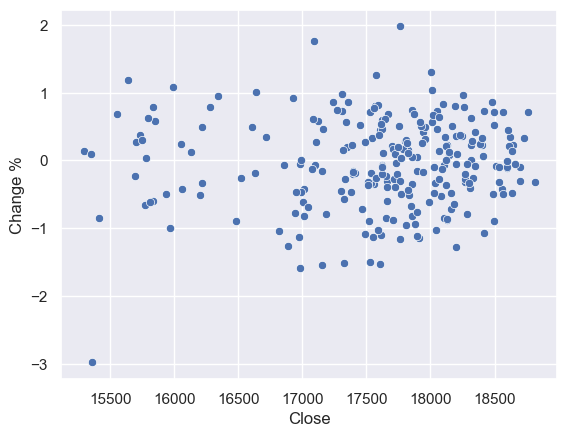

In [20]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x='Close', y='Change %', data=df_new)
graph

In [28]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Close, Change %)", "(@Close, @{Change %})"),
    ]
)

# Create a ColumnDataSource from df_new
source = ColumnDataSource(df_new)

p = figure(title="Nifty Expiry Performance", x_axis_label='Close', y_axis_label='Change %', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle('Close', 'Change %', size=10, source=source)

show(p)
